## Number crunching for 2020 tax year

In [1]:
import sympy as sp
import matplotlib
%matplotlib notebook
from ipywidgets import *

| AGI Federal Tax Brackets |  Notes     |
|:-----------------|:-----------| 
|![tax_brackets](https://i2.wp.com/moneysavvymindset.com/wp-content/uploads/2019/11/Federal-income-tax-rates-for-single-unmarried-2020.png?resize=567%2C228&ssl=1)| <ul><li>[Gross Income(GI)](https://www.investopedia.com/terms/g/grossincome.asp): Includes your wages, dividends, capital gains, business income, retirement distributions as well as other income</li><br><li>[Adjusted Gross Income(AGI):](https://www.irs.gov/e-file-providers/definition-of-adjusted-gross-income) Gross Income minus adjustments to income. AKA *taxable income*. Above the line adjustments include: contributions to retirement accounts (401K, IRA, HSA), student loans, mortgage interest</li><br><li>For single tax payers the standard deduction is $12,400</li></ul>|


## Lets make a piece wise equation from the table

In [2]:
AGI, GI, deductions = sp.symbols('AGI GI deductions')
AGI = GI - deductions

tax_fed=sp.Piecewise((0,                          AGI<0),
                     (0.10*AGI,                   AGI<=9875), 
                     (987.50  + 0.12*(AGI-9875),  AGI<=40125),
                     (4617.50 + 0.22*(AGI-40125), AGI<=85525),
                     (14605.5 + 0.24*(AGI-85525), AGI<=163000),
                     (33271.5 + 0.32*(AGI-163300),AGI<=207350),
                     (47367.5 + 0.35*(AGI-207350),AGI<=518400),
                     (156235  + 0.37*(AGI-518401),True))

tax_fed

Piecewise((0, GI - deductions < 0), (0.1*GI - 0.1*deductions, GI - deductions <= 9875), (0.12*GI - 0.12*deductions - 197.5, GI - deductions <= 40125), (0.22*GI - 0.22*deductions - 4210.0, GI - deductions <= 85525), (0.24*GI - 0.24*deductions - 5920.5, GI - deductions <= 163000), (0.32*GI - 0.32*deductions - 18984.5, GI - deductions <= 207350), (0.35*GI - 0.35*deductions - 25205.0, GI - deductions <= 518400), (0.37*GI - 0.37*deductions - 35573.37, True))

<IPython.core.display.Javascript object>


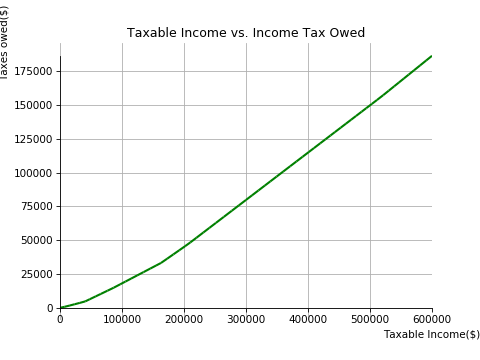

In [12]:
matplotlib.rc('lines', linewidth=2, color='g')
matplotlib.rcParams['axes.grid'] = True
plot0=sp.plotting.plot(tax_fed.subs(deductions,0), (GI, 0, 600000),
                       title='Taxable Income vs. Income Tax Owed', ylabel='Taxes owed($)', xlabel='Taxable Income($)')

#### Verify that we can input an income level and get amount owed in federal income taxes

In [4]:
tax_fed.subs([(GI,123456),(deductions,0)])

23708.9400000000

----
### Add payroll taxes (FICA): Social Security and Medicare taxes
- [fica tax breakdown](https://www.ssa.gov/news/press/factsheets/colafacts2020.pdf)
- [additional medicare tax](https://www.irs.gov/businesses/small-businesses-self-employed/questions-and-answers-for-the-additional-medicare-tax)

In [5]:
ss_tax = sp.Piecewise((0.062*GI,         GI<137000),
                      (8494,             True))

medicare_tax = sp.Piecewise( (0.0145*GI,        GI<200000),
                            ((0.0145+0.009)*GI, True))

tax_FICA = ss_tax + medicare_tax

<IPython.core.display.Javascript object>


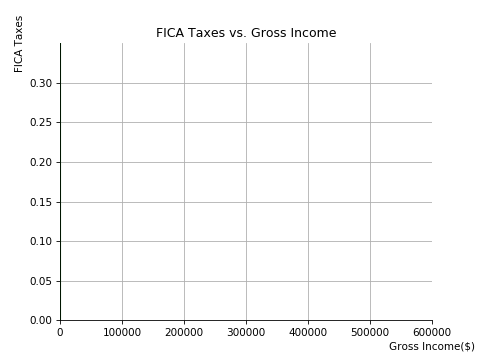

In [13]:
matplotlib.rc('lines', linewidth=2, color='g')
plot1=sp.plotting.plot(tax_FICA, (GI, 0, 600000),
                 title='FICA Taxes vs. Gross Income', ylabel='FICA Taxes', xlabel='Gross Income($)')

#### Verify that we can input a gross and adjusted income and get taxes owed

In [7]:
tax_FICA.subs(GI, 123456)

9444.38400000000

----
## Let's look at taxed percenage as a function of income

In [8]:
effective_tax_rate = (tax_FICA + tax_fed)/GI
effective_tax_rate

(Piecewise((0.0145*GI, GI < 200000), (0.0235*GI, True)) + Piecewise((0.062*GI, GI < 137000), (8494, True)) + Piecewise((0, GI - deductions < 0), (0.1*GI - 0.1*deductions, GI - deductions <= 9875), (0.12*GI - 0.12*deductions - 197.5, GI - deductions <= 40125), (0.22*GI - 0.22*deductions - 4210.0, GI - deductions <= 85525), (0.24*GI - 0.24*deductions - 5920.5, GI - deductions <= 163000), (0.32*GI - 0.32*deductions - 18984.5, GI - deductions <= 207350), (0.35*GI - 0.35*deductions - 25205.0, GI - deductions <= 518400), (0.37*GI - 0.37*deductions - 35573.37, True)))/GI

In [9]:
effective_tax_rate.subs([(GI,123456),(deductions,0)])

0.268543643079316

Taxable income will shift in the x-axis depending on the amount of deductions. let's plot for a given range and 
change around the deduction amount

In [14]:
def eff_tax(deduct = 0):
    matplotlib.pyplot.ylim(0,0.35)
    sp.plotting.plot(effective_tax_rate.subs(deductions,deduct), (GI, 0, 600000),
                     title='Effective tax rate', ylabel='% Taxed)', xlabel='Earned Income($)')
    
interact(eff_tax, deduct=(0,50000,1000));

interactive(children=(IntSlider(value=0, description='deduct', max=50000, step=1000), Output()), _dom_classes=…

### TODO: Add slider to deduction value to show shift of federal tax

#### overlay the rate of change to see the areas of most benefit

 ## *Goal is be to minimize the effective tax rate*